# Company - Code Clause

### Name: Pawaskar Karishma

### Task1: Fake News Detection

### Domain: Data Science

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import re
import string

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [9]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [10]:
from sklearn.naive_bayes import MultinomialNB

In [9]:
pip install nltk

     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.5 MB 991.0 kB/s eta 0:00:02
     --- ------------------------------------ 0.1/1.5 MB 1.7 MB/s eta 0:00:01
     ------- -------------------------------- 0.3/1.5 MB 2.1 MB/s eta 0:00:01
     ---------- ----------------------------- 0.4/1.5 MB 2.0 MB/s eta 0:00:01
     ----------- ---------------------------- 0.4/1.5 MB 1.9 MB/s eta 0:00:01
     -------------- ------------------------- 0.5/1.5 MB 2.0 MB/s eta 0:00:01
     ------------------ --------------------- 0.7/1.5 MB 2.2 MB/s eta 0:00:01
     --------------------- ------------------ 0.8/1.5 MB 2.2 MB/s eta 0:00:01
     ----------------------- ---------------- 0.9/1.5 MB 2.1 MB/s eta 0:00:01
     -------------------------- ------------- 1.0/1.5 MB 2.1 MB/s eta 0:00:01
     ---------------------------- ----------- 1.1/1.5 MB 2.3 MB/s eta 0:00:01
     ---------------------------- ----------- 1.1/1.5 MB 2.3 MB/s eta

In [11]:
from nltk.corpus import stopwords

# Importing Dataset

In [12]:
news_df=pd.read_csv("news.csv")

# Understanding Dataset

In [13]:
news_df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [14]:
news_df.shape

(6335, 4)

In [15]:
news_df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [16]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


# Checking Null Values

In [17]:
news_df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [18]:
news_df.duplicated().sum()

0

In [19]:
news_df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

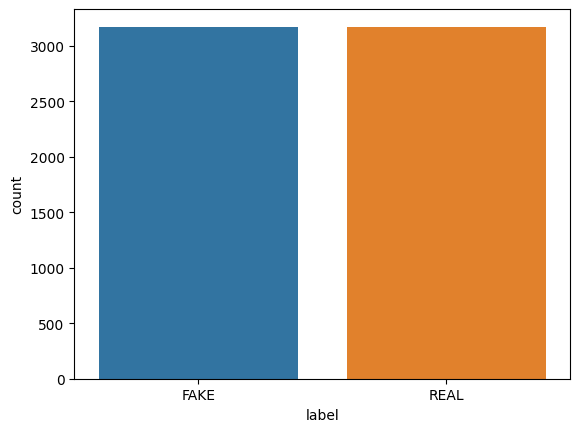

In [20]:
sns.countplot(x='label', data=news_df)

# Training the Dataset

In [33]:
labels=news_df.label

In [34]:
X_train, X_test, y_train, y_test=train_test_split(news_df['text'], labels, test_size=0.2, random_state=20)

### Initializing TfidfVectorizer 

In [35]:
vector = TfidfVectorizer(stop_words="english", max_df=0.7)

In [36]:
N_train = vector.fit_transform(X_train)

In [37]:
N_test = vector.transform(X_test)

### Initializing PassiveAggressiveClassifier

In [38]:
passive = PassiveAggressiveClassifier(max_iter=50)
passive.fit(N_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

### Predict the model

In [39]:
y_pred = passive.predict(N_test)

### Accuracy Score of model

In [40]:
score = accuracy_score(y_test, y_pred)

In [41]:
print(score)

0.9447513812154696


In [29]:
print(f"Accuracy:{round(score*100,2)}%")

Accuracy:94.95%


### Confusion Matrix

In [42]:
confusion_matrix(y_test, y_pred, labels=['FAKE','REAL'])

array([[619,  29],
       [ 41, 578]], dtype=int64)